In [1]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Armazendo os dados na variável 'dados'
dados = pd.read_csv('../Dados/supermarket_sales.csv')
dados.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
#Traduzindo as colunas do Dataset
dados.rename(columns={'Branch':'Filial', 
                       'City':'Cidade', 
                       'Customer type':'Tipo_cliente', 
                       'Gender': 'Genero',
                       'Product line': 'Linha_produto',
                       'Unit price': 'Preco_unitario', 
                       'Quantity':'Quantidade',
                       'Tax 5%': 'Imposto', 
                       'Date': 'Data',
                       'Time': 'Horario', 
                       'Payment': 'Pagamento',
                       'cogs':'CPV',
                       'gross margin percentage': 'Margem_bruta',
                       'gross income': 'Lucro_bruto',
                       'Rating':'Classificação'}, inplace = True)

In [4]:
#Traduzindo as linhas do dataset
dados['Tipo_cliente'].replace({'Member':'Associado'}, inplace = True)
dados['Linha_produto'].replace({'Health and beauty':'Saude e beleza', 'Electronic accessories':'Acessorios eletonicos',
       'Home and lifestyle':'Casa e estilo de vida', 'Sports and travel':'Esporte e viagens', 'Food and beverages':'Alimentos e bebidas',
       'Fashion accessories':'Acessorios de moda'}, inplace = True)
dados['Pagamento'].replace({'Ewallet':'Carteira digital', 'Cash':'Dinheiro', 'Credit card':'Cartao de credito'}, inplace = True)
dados['Genero'].replace({'Female': 'Feminino', 'Male':'Masculino'}, inplace = True)
dados

,Invoice ID,Filial,Cidade,Tipo_cliente,Genero,Linha_produto,Preco_unitario,Quantidade,Imposto,Total,Data,Horario,Pagamento,CPV,Margem_bruta,Lucro_bruto,Classificação
0,750-67-8428,A,Yangon,Associado,Feminino,Saude e beleza,74.69,7,26.1415,548.9715,1/5/2019,13:08,Carteira digital,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Feminino,Acessorios eletonicos,15.28,5,3.8200,80.2200,3/8/2019,10:29,Dinheiro,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Masculino,Casa e estilo de vida,46.33,7,16.2155,340.5255,3/3/2019,13:23,Cartao de credito,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Associado,Masculino,Saude e beleza,58.22,8,23.2880,489.0480,1/27/2019,20:33,Carteira digital,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Masculino,Esporte e viagens,86.31,7,30.2085,634.3785,2/8/2019,10:37,Carteira digital,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Masculino,Saude e beleza,40.35,1,2.0175,42.3675,1/29/2019,13:46,Carteira digital,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Feminino,Casa e estilo de vida,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Carteira digital,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Associado,Masculino,Alimentos e bebidas,31.84,1,1.5920,33.4320,2/9/2019,13:22,Dinheiro,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Masculino,Casa e estilo de vida,65.82,1,3.2910,69.1110,2/22/2019,15:33,Dinheiro,65.82,4.761905,3.2910,4.1


In [5]:
#Salvandoos dados tratados
dados.to_csv('../Dados/dados_tratados.csv')

## Analise exploratória

In [20]:
tab_dupla = pd.crosstab(index = dados['Pagamento'], columns = dados['Filial'])
tab_dupla

Filial,A,B,C
Pagamento,,,
Cartao de credito,104,109,98
Carteira digital,126,113,106
Dinheiro,110,110,124


<AxesSubplot:xlabel='Pagamento'>

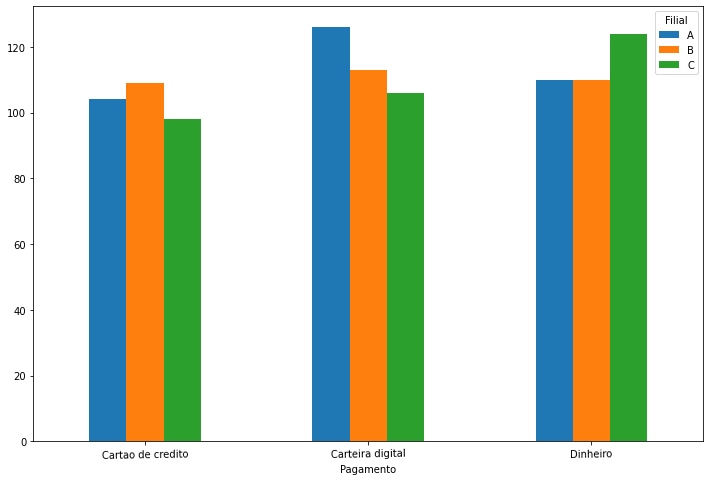

In [21]:
tab_dupla.plot.bar(rot = 1, figsize = (12,8))

In [22]:
dados['Pagamento'].value_counts()

Carteira digital     345
Dinheiro             344
Cartao de credito    311
Name: Pagamento, dtype: int64